In [2]:
!pip install xgboost


     ---------------------------------------- 89.1/89.1 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [6]:
water = pd.read_csv("water.csv", index_col="Unnamed: 0")

In [7]:
X = water.drop(columns="Potability")
Y = water.Potability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80, random_state=42, stratify=Y)

In [15]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 17, 20],
 "min_child_weight" : [0.25, 0.05, 0.5, 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [50, 100, 200, 150, 250, 300] 
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_clf=XGBClassifier()

random_search=RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='roc_auc',
                                 n_jobs=-1, cv=kfold, verbose=3, random_state=42)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           intera...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 13,
                                                      14, 15, 17, 20],
                                        'min_child_weight': [0.25, 0.05, 0.5, 1,
                                                             3, 5, 7],
                                        'n_estimators': [50, 100, 200, 150, 250,
                                                         300]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [16]:
random_search.best_params_, random_search.best_estimator_

({'n_estimators': 250,
  'min_child_weight': 0.5,
  'max_depth': 20,
  'learning_rate': 0.2,
  'gamma': 0.3,
  'colsample_bytree': 0.7},
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=20, max_leaves=0,
               min_child_weight=0.5, missing=nan, monotone_constraints='()',
               n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
               random_state=0, reg_alpha=0, reg_lambda=1, ...))

In [17]:
model = XGBClassifier(n_estimators= 250, min_child_weight= 0.5, max_depth= 20, learning_rate= 0.2, gamma= 0.3,
                      colsample_bytree= 0.7, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[183  57]
 [ 83 173]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       240
         1.0       0.75      0.68      0.71       256

    accuracy                           0.72       496
   macro avg       0.72      0.72      0.72       496
weighted avg       0.72      0.72      0.72       496



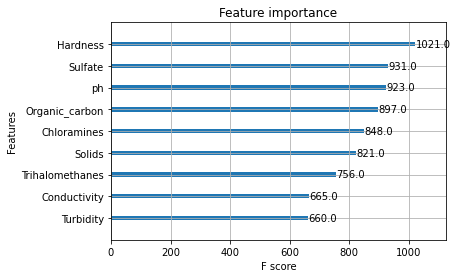

<Figure size 1440x1800 with 0 Axes>

In [25]:
import xgboost as xgb

xgb.plot_importance(model)
plt.figure(figsize = (20, 25))
plt.show()

In [18]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2473,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
2474,7.808856,193.553212,17329.802160,8.061362,333.578349,392.449580,19.903225,66.396293,2.798243
2475,9.419510,175.762646,33155.578218,7.350233,333.578349,432.044783,11.039070,69.845400,3.298875
2476,5.126763,230.603758,11983.869376,6.303357,333.578349,402.883113,11.168946,77.488213,4.708658


In [19]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2473    1.0
2474    1.0
2475    1.0
2476    1.0
2477    1.0
Name: Potability, Length: 2478, dtype: float64

In [21]:
water = pd.read_csv("water.csv", index_col="Unnamed: 0")

In [26]:
X = water.drop(columns=["Potability","Turbidity","Conductivity"])
Y = water.Potability

In [27]:
model = XGBClassifier(n_estimators= 250, min_child_weight= 0.5, max_depth= 20, learning_rate= 0.2, gamma= 0.3,
                      colsample_bytree= 0.7, random_state=42)
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

In [28]:
import pickle
with open(file="Final_model.pkl", mode="wb") as f:
    pickle.dump(model, f)

In [29]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes
0,8.316766,214.373394,22018.417441,8.059332,356.886136,18.436524,100.341674
1,9.092223,181.101509,17978.986339,6.546600,310.135738,11.558279,31.997993
2,5.584087,188.313324,28748.687739,7.544869,326.678363,8.399735,54.917862
3,10.223862,248.071735,28749.716544,7.513408,393.663396,13.789695,84.603556
4,8.635849,203.361523,13672.091764,4.563009,303.309771,12.363817,62.798309
...,...,...,...,...,...,...,...
2473,4.668102,193.681735,47580.991603,7.166639,359.948574,13.894419,66.687695
2474,7.808856,193.553212,17329.802160,8.061362,333.578349,19.903225,66.396293
2475,9.419510,175.762646,33155.578218,7.350233,333.578349,11.039070,69.845400
2476,5.126763,230.603758,11983.869376,6.303357,333.578349,11.168946,77.488213
